In [1]:
import torch
import os
import scanpy as sc
import pandas as pd
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

/home/zhaoyubiao/miniconda3/envs/graph/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path = 'data/sim2.pth'
data = torch.load(data_path)
adata_st = sc.read('sim_st_2.h5ad')

model_path = 'models/GCN_model_sim2.pth'
model = torch.load(model_path)
logits = model(data.x, data.edge_index)
prob,_ = model(data.x, data.edge_index).exp().max(dim=1)
adata_st.obs['pred']=logits.argmax(dim=1).detach().numpy()
adata_st.obs['pred']=adata_st.obs['pred'].astype('category')
adata_st.obs['pred_probability']=prob.detach().numpy()
print(adata_st.obs['pred_probability'])
adata_st.write_h5ad('sim_st_pred_2.h5ad')

Cell1       0.790858
Cell2       0.787134
Cell3       0.657490
Cell4       0.792818
Cell5       0.789991
              ...   
Cell996     0.777545
Cell997     0.786815
Cell998     0.771085
Cell999     0.793071
Cell1000    0.735879
Name: pred_probability, Length: 1000, dtype: float32


In [3]:

adata_st.obs['pred']

Cell1       3
Cell2       0
Cell3       2
Cell4       0
Cell5       0
           ..
Cell996     0
Cell997     0
Cell998     0
Cell999     0
Cell1000    1
Name: pred, Length: 1000, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

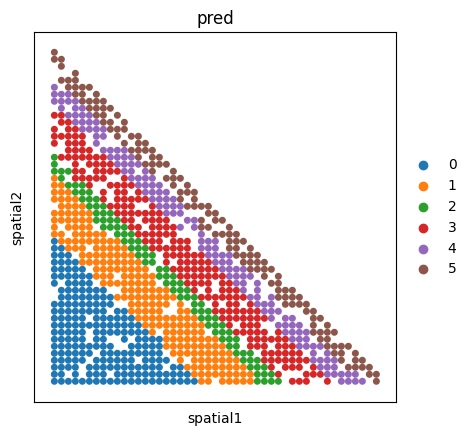

In [4]:
adata_st1 = adata_st.copy()
# 将y坐标取反一次
adata_st1.obsm['spatial'][:, 1] = -adata_st1.obsm['spatial'][:, 1]

sc.pl.spatial(adata_st1, spot_size=1 ,color='pred')